# Detector de Noticias Falsas en español 
#### Ortega Zitle Ariel 201719454

### Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Carga de datos

In [2]:
fake_train = pd.read_excel("train.xlsx")
fake_valid = pd.read_excel("development.xlsx")
fake_test = pd.read_excel("test.xlsx")

In [3]:
fake_train.tail()

,Id,Category,Topic,Source,Headline,Text,Link
671,672,Fake,Entertainment,El Dizque,Madonna será la nueva imagen del Chocolate Abu...,Madonna será la nueva imagen del Chocolate Abu...,https://www.eldizque.com/madonna-sera-la-nueva...
672,673,True,Entertainment,Radio Formula,"Filtran material íntimo de Zelina Vega, luchad...","Filtran material íntimo de Zelina Vega, luchad...",http://www.radioformula.com.mx/notas.asp?Idn=7...
673,674,Fake,Entertainment,La Voz Popular,CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...,CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...,http://lavozpopular.com/cbs-planea-gran-herman...
674,675,Fake,Entertainment,El Dizque,TV Azteca anuncia que cambiará su nombre por u...,TV Azteca anuncia que cambiará su nombre por u...,https://www.eldizque.com/tv-azteca-anuncia-que...
675,676,Fake,Entertainment,La voz popular,MUERTE DE PETER EL ANGUILA POR SOBREDOSIS,MUERTE DE PETER EL ANGUILA POR SOBREDOSIS\nPet...,http://lavozpopular.com/muerte-peter-el-anguil...


In [4]:
fake_test

,ID,CATEGORY,TOPICS,SOURCE,HEADLINE,TEXT,LINK
0,1,True,Covid-19,El Economista,Covid-19: mentiras que matan,El control de la Covid-19 no es sólo un tema d...,https://www.eleconomista.com.mx/opinion/Covid-...
1,2,False,Política,El matinal,El Gobierno podrá acceder a las IPs de los móv...,El Gobierno de Pedro Sánchez y Pablo Iglesias ...,https://www.elmatinal.com/espana-ultima-hora/e...
2,3,True,Política,El País,La comunidad musulmana catalana denuncia a Vox...,Las tres federaciones que agrupan al 90% de la...,https://elpais.com/espana/elecciones-catalanas...
3,4,False,Política,AFPFactual,NaN,Se han dado a conocer los datos electorales pr...,https://perma.cc/GYE6-SPMB
4,5,True,Sociedad,La Republica,El censo poblacional 2018 tendrá un costo de $...,La primera fase del censo será virtual y solo ...,https://www.larepublica.co/economia/el-censo-p...
...,...,...,...,...,...,...,...
567,568,True,Covid-19,El Financiero,Encuentran nueva variante de COVID en México: ...,El Instituto de Diagnóstico y Referencia Epide...,https://www.elfinanciero.com.mx/salud/encuentr...
568,569,False,Sociedad,diariogol,El móvil de más de 60.000 euros de la princesa...,La hija del rey Felipe y de la reina Letizia y...,https://www.diariogol.com/gossip/el-movil-de-m...
569,570,False,Política,AFPFactual,NaN,"Evidentemente, Barak Obama ha sido arrestado e...","Perma | Obama, Biden y la directora de la CIA,..."
570,571,True,Covid-19,Redacción Médica,Covid: las vacunas puestas en España no alcanz...,El Ministerio de Sanidad ha actualizado los da...,https://www.redaccionmedica.com/secciones/sani...


In [5]:
fake_valid.tail(10)

,Id,Category,Topic,Source,Headline,Text,Link
285,286,Fake,Entertainment,El Ruinaversal,CARMEN ARISTEGUI SUSTITUIRÁ A JAVIER ALATORRE ...,CARMEN ARISTEGUI SUSTITUIRÁ A JAVIER ALATORRE ...,http://www.elruinaversal.com/2017/06/02/carmen...
286,287,True,Entertainment,HUFFPOST,Warner Bros inagura una exposición con los tra...,Warner Bros inagura una exposición con los tra...,https://www.huffingtonpost.es/2016/05/20/expos...
287,288,True,Entertainment,El Universal,Critican libro de Yordi Rosado en redes,Critican libro de Yordi Rosado en redes\nUsuar...,http://www.eluniversal.com.mx/articulo/cultura...
288,289,True,Entertainment,EL UNIVERSAL,A Belinda le gustaría apoyar al gobierno de AMLO,A Belinda le gustaría apoyar al gobierno de AM...,http://www.eluniversal.com.mx/espectaculos/far...
289,290,True,Entertainment,Hola,"Diego Maradona se alejó de la iglesia, 'pero e...","Diego Maradona se alejó de la iglesia, 'pero e...",https://us.hola.com/actualidad/201610135662/di...
290,291,True,Entertainment,HUFFPOST,Meryl Streep disfrutó unos premios Oscar tan m...,Meryl Streep disfrutó unos premios Oscar tan m...,https://www.huffingtonpost.com.mx/2018/03/06/m...
291,292,Fake,Entertainment,La voz popular,EL PLAGIO DE LANA DEL REY A RADIOHEAD FUE ACOR...,EL PLAGIO DE LANA DEL REY A RADIOHEAD FUE ACOR...,http://lavozpopular.com/plagio-lana-del-rey-ra...
292,293,True,Entertainment,Billboard,Ricardo Arjona lanza una serie documental por ...,Ricardo Arjona lanza una serie documental por ...,http://www.billboard.com.ar/noticia/2980/ricar...
293,294,True,Entertainment,EL UNIVERSAL,Raúl Araiza sorprende a Andrea Legarreta con b...,Raúl Araiza sorprende a Andrea Legarreta con b...,http://www.eluniversal.com.mx/espectaculos/rau...
294,295,Fake,Entertainment,El Dizque,Adal Ramones protagonizará el remake de El Cha...,Adal Ramones protagonizará el remake de El Cha...,https://www.eldizque.com/adal-ramones-protagon...


In [6]:
# Let's take a look at our data again
fake_train.keys()

Index(['Id', 'Category', 'Topic', 'Source', 'Headline', 'Text', 'Link'], dtype='object')

In [7]:
#pd.unique(fake_train['Text'])

### Analisis de dataset

Text(0, 0.5, 'News')

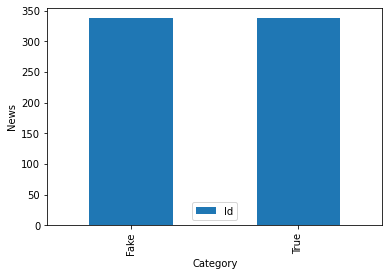

In [8]:
fake_train.groupby('Category')['Id'].count().plot(kind='bar',legend='reversed')
plt.ylabel('News')

Text(0, 0.5, 'News')

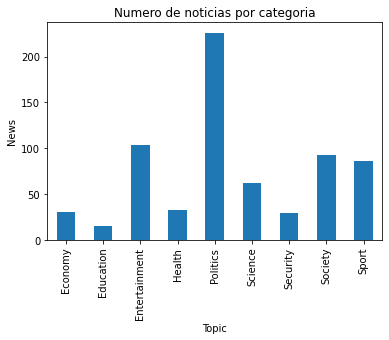

In [9]:
fake_train.Category.groupby(fake_train.Topic).count().plot(kind='bar')
plt.title("Numero de noticias por categoria")
plt.ylabel('News')

## Creacion de StopWords

### Limpieza de datos

In [52]:
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [56]:
fake_train.Text[2]

'YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS LIBROS DE TEXTO DE LA SEP PARA HACERLOS MÁS ATRACTIVOS\nMéxico.- El director de la Secretaría de Educación Pública, Aurelio Nuño, informó que el dramaturgo y conductor Yordi Rosado será el encargado de redactar los nuevos libros de texto que se reparten en todas las escuelas del país, y que a partir del próximo ciclo escolar dejarán de ser gratuitos y tendrán costo.\nAurelio señala que decidió contratar a Yordi para escribir los manuales con el fin de hacer "más atractivos los textos" y que los alumnos se interesen más por aprender, por lo que los libros dejarán de tener un lenguaje aburrido y serán presentados con un idioma "más fresco, juvenil y moderno":\n"Desafortunadamente el gobierno ya no tiene los recursos para seguir regalando los libros, por lo que a partir del próximo ciclo escolar los padres de familia deberán hacer un pequeño sacrificio y pagar una módica cantidad para que sus hijos puedan seguir aprendiendo. Realmente es algo 

In [54]:
data_clean = pd.DataFrame(fake_train.Text.apply(round1))

In [57]:
data_clean.Text[2]

'yordi rosado escribirá y diseñará los nuevos libros de texto de la sep para hacerlos más atractivosméxico el director de la secretaría de educación pública aurelio nuño informó que el dramaturgo y conductor yordi rosado será el encargado de redactar los nuevos libros de texto que se reparten en todas las escuelas del país y que a partir del próximo ciclo escolar dejarán de ser gratuitos y tendrán costoaurelio señala que decidió contratar a yordi para escribir los manuales con el fin de hacer más atractivos los textos y que los alumnos se interesen más por aprender por lo que los libros dejarán de tener un lenguaje aburrido y serán presentados con un idioma más fresco juvenil y modernodesafortunadamente el gobierno ya no tiene los recursos para seguir regalando los libros por lo que a partir del próximo ciclo escolar los padres de familia deberán hacer un pequeño sacrificio y pagar una módica cantidad para que sus hijos puedan seguir aprendiendo realmente es algo simbólico cada libro c